In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report ,roc_auc_score , roc_curve
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier


/Users/shubhamkumar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_excel('Student.xlsx')

In [4]:
df=DataFrame(data)

In [5]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',109)

In [6]:
pd.options.display.float_format = '{:.3f}'.format

In [7]:
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,nan,1150.000,1150.000,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.000,4.000,SCHOOL 50,nan,No Information,nan,No Information,B,Bachelors,16,16,14.000,14.000,0,0,0,0.000
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.000,nan,1190.000,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,200902,ECON 2105,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.000,2.890,SCHOOL 389,3.000,College/Beyond,3.000,College/Beyond,B,Bachelors,18,18,18.000,18.000,570000,1355760,785760,459300.000
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,nan,1020.000,1030.000,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,201102,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,150.000,3.390,SCHOOL 82,2.000,High School,4.000,Other/Unknown,B,Bachelors,15,15,14.000,14.000,0,0,0,0.000
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,nan,1210.000,1220.000,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,MUSC 1100,A,NaN,NaN,NaN,NaN,On Campus,1,150.000,2.930,SCHOOL 180,3.000,College/Beyond,3.000,College/Beyond,B,Bachelors,13,13,14.000,14.000,0,0,0,0.000
4,7962680,18,F,BGD 1,Y,N,Art,N,nan,1200.000,1190.000,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,COMM 1110,A,ENGL 1101,A,HIST 2111,A,PSYC 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.000,3.860,SCHOOL 2,3.000,College/Beyond,2.000,High School,B,Bachelors,12,12,12.000,12.000,835920,1355760,519840,278340.000


In [8]:
df.rename(columns={'STUDENT IDENTIFIER':'STUDENT_IDENTIFIER'},inplace=True)

In [9]:
df.head()

,STUDENT_IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,nan,1150.000,1150.000,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.000,4.000,SCHOOL 50,nan,No Information,nan,No Information,B,Bachelors,16,16,14.000,14.000,0,0,0,0.000
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.000,nan,1190.000,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,200902,ECON 2105,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.000,2.890,SCHOOL 389,3.000,College/Beyond,3.000,College/Beyond,B,Bachelors,18,18,18.000,18.000,570000,1355760,785760,459300.000
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,nan,1020.000,1030.000,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,201102,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,150.000,3.390,SCHOOL 82,2.000,High School,4.000,Other/Unknown,B,Bachelors,15,15,14.000,14.000,0,0,0,0.000
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,nan,1210.000,1220.000,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,MUSC 1100,A,NaN,NaN,NaN,NaN,On Campus,1,150.000,2.930,SCHOOL 180,3.000,College/Beyond,3.000,College/Beyond,B,Bachelors,13,13,14.000,14.000,0,0,0,0.000
4,7962680,18,F,BGD 1,Y,N,Art,N,nan,1200.000,1190.000,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,COMM 1110,A,ENGL 1101,A,HIST 2111,A,PSYC 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.000,3.860,SCHOOL 2,3.000,College/Beyond,2.000,High School,B,Bachelors,12,12,12.000,12.000,835920,1355760,519840,278340.000


In [10]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [11]:
import webbrowser
webbrowser.open('http://localhost:8888/view/new/Capstone%20project/output.html')

True

In [12]:
df_returned=df.drop(df[df['RETURNED_2ND_YR'] == 0].index)

In [13]:
df_not_returned=df.drop(df[df['RETURNED_2ND_YR'] == 1].index)

In [14]:
df['RETURNED_2ND_YR'].value_counts()

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

In [15]:
perc=df['RETURNED_2ND_YR'].value_counts()

In [16]:
round(perc/3400*100)

1   79.000
0   21.000
Name: RETURNED_2ND_YR, dtype: float64

# AGE

In [17]:
df['STDNT_AGE'].isnull().sum()

0

In [18]:
df['STDNT_AGE'].describe()

count   3400.000
mean      17.994
std        0.552
min       16.000
25%       18.000
50%       18.000
75%       18.000
max       26.000
Name: STDNT_AGE, dtype: float64

In [19]:
age_perc=df['STDNT_AGE'].value_counts()

In [20]:
# Age distribution in percentage
round(age_perc/3400*100,2)

18   84.120
17    9.090
19    5.590
20    0.410
16    0.240
21    0.210
22    0.120
25    0.090
23    0.090
26    0.030
24    0.030
Name: STDNT_AGE, dtype: float64

In [21]:
age_returned_perc=df_returned['STDNT_AGE'].value_counts()

In [22]:
# Age distribution in percentage
round(age_returned_perc/2677*100,2)

18   84.830
17    9.000
19    5.190
20    0.300
16    0.190
25    0.110
23    0.110
21    0.110
22    0.110
26    0.040
Name: STDNT_AGE, dtype: float64

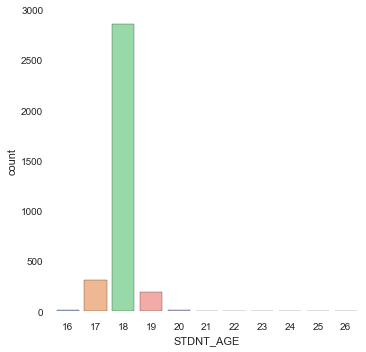

In [23]:
sns.catplot(x="STDNT_AGE", kind="count",
            palette="pastel", edgecolor=".1",
            data=df);

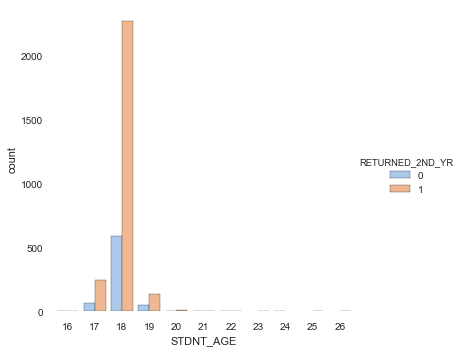

In [24]:
sns.catplot(x="STDNT_AGE", hue="RETURNED_2ND_YR", kind="count",
            palette="pastel", edgecolor=".1",
            data=df);

# GENDER


In [25]:
df['STDNT_GENDER'].isnull().sum()

0

In [26]:
df['STDNT_GENDER'].describe()

count     3400
unique       2
top          F
freq      2140
Name: STDNT_GENDER, dtype: object

In [27]:
df['STDNT_GENDER'].value_counts()

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

In [28]:
gender_perc=df['STDNT_GENDER'].value_counts()

In [29]:
round(gender_perc/3400*100)

F   63.000
M   37.000
Name: STDNT_GENDER, dtype: float64

In [30]:
pd.crosstab(df.STDNT_GENDER,df.RETURNED_2ND_YR,margins=True)

RETURNED_2ND_YR,0,1,All
STDNT_GENDER,,,
F,475,1665,2140
M,248,1012,1260
All,723,2677,3400


In [31]:
pd.crosstab(df.STDNT_GENDER,df.RETURNED_2ND_YR,margins=True,normalize='all')

RETURNED_2ND_YR,0,1,All
STDNT_GENDER,,,
F,0.140,0.490,0.629
M,0.073,0.298,0.371
All,0.213,0.787,1.000


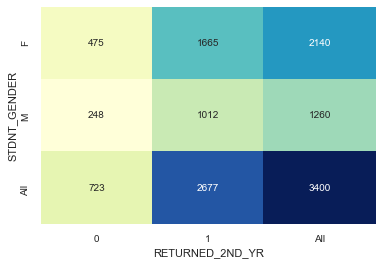

In [32]:
sns.heatmap(pd.crosstab([df.STDNT_GENDER],[df.RETURNED_2ND_YR],margins=True),cmap='YlGnBu', annot=True, cbar=False,fmt='g')

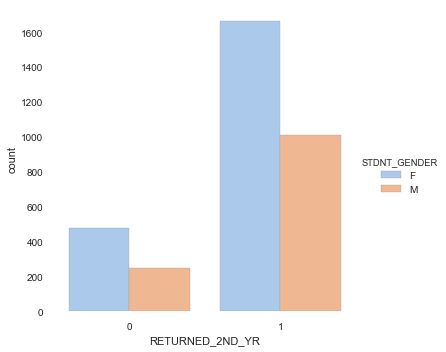

In [33]:
sns.catplot(x="RETURNED_2ND_YR", hue="STDNT_GENDER", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

# STDNT_BACKGROUND


In [34]:
df['STDNT_BACKGROUND'].isnull().sum()

0

In [35]:
df['STDNT_BACKGROUND'].describe()

count      3400
unique        8
top       BGD 1
freq       2082
Name: STDNT_BACKGROUND, dtype: object

In [36]:
df['STDNT_BACKGROUND'].value_counts()

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [37]:
bgd_perc=df['STDNT_BACKGROUND'].value_counts()

In [38]:
round(bgd_perc/3400*100,2)

BGD 1   61.240
BGD 3   27.850
BGD 4    4.090
BGD 2    3.120
BGD 6    2.760
BGD 7    0.560
BGD 5    0.240
BGD 8    0.150
Name: STDNT_BACKGROUND, dtype: float64

In [39]:
pd.crosstab(df.STDNT_BACKGROUND,df.RETURNED_2ND_YR,margins=True)

RETURNED_2ND_YR,0,1,All
STDNT_BACKGROUND,,,
BGD 1,477,1605,2082
BGD 2,24,82,106
BGD 3,170,777,947
BGD 4,26,113,139
BGD 5,4,4,8
BGD 6,14,80,94
BGD 7,7,12,19
BGD 8,1,4,5
All,723,2677,3400


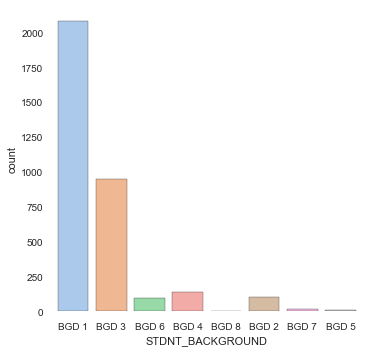

In [40]:
sns.catplot(x="STDNT_BACKGROUND", kind="count",
            palette="pastel", edgecolor=".1",
            data=df);

In [41]:
pd.crosstab(df_not_returned.STDNT_BACKGROUND,df_not_returned.RETURNED_2ND_YR,margins=True)

RETURNED_2ND_YR,0,All
STDNT_BACKGROUND,,
BGD 1,477,477
BGD 2,24,24
BGD 3,170,170
BGD 4,26,26
BGD 5,4,4
BGD 6,14,14
BGD 7,7,7
BGD 8,1,1
All,723,723


In [42]:
a=pd.crosstab(df.STDNT_BACKGROUND,df.RETURNED_2ND_YR,margins=True,normalize='all')

In [43]:
round(a,3)

RETURNED_2ND_YR,0,1,All
STDNT_BACKGROUND,,,
BGD 1,0.140,0.472,0.612
BGD 2,0.007,0.024,0.031
BGD 3,0.050,0.229,0.279
BGD 4,0.008,0.033,0.041
BGD 5,0.001,0.001,0.002
BGD 6,0.004,0.024,0.028
BGD 7,0.002,0.004,0.006
BGD 8,0.000,0.001,0.001
All,0.213,0.787,1.000


In [44]:
pd.crosstab(df_not_returned.STDNT_BACKGROUND,df_not_returned.RETURNED_2ND_YR,normalize='all')

RETURNED_2ND_YR,0
STDNT_BACKGROUND,
BGD 1,0.660
BGD 2,0.033
BGD 3,0.235
BGD 4,0.036
BGD 5,0.006
BGD 6,0.019
BGD 7,0.010
BGD 8,0.001


# IN_STATE_FLAG

In [45]:
df['IN_STATE_FLAG'].isnull().sum()

0

In [46]:
df['IN_STATE_FLAG'].describe()

count     3400
unique       2
top          Y
freq      3063
Name: IN_STATE_FLAG, dtype: object

In [47]:
df['IN_STATE_FLAG'].value_counts()

Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64

In [48]:
flag_perc=df['IN_STATE_FLAG'].value_counts()

In [49]:
round(flag_perc/3400*100,2)

Y   90.090
N    9.910
Name: IN_STATE_FLAG, dtype: float64

In [50]:
flag_returned_perc=df_returned['IN_STATE_FLAG'].value_counts()

In [51]:
round(flag_returned_perc/2677*100,2)

Y   90.740
N    9.260
Name: IN_STATE_FLAG, dtype: float64

# INTERNATIONAL_STS

In [52]:
df['INTERNATIONAL_STS'].isnull().sum()

0

In [53]:
df['INTERNATIONAL_STS'].describe()

count     3400
unique       2
top          N
freq      3373
Name: INTERNATIONAL_STS, dtype: object

In [54]:
df['INTERNATIONAL_STS'].value_counts()

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [55]:
international_perc=df['INTERNATIONAL_STS'].value_counts()

In [56]:
#percentage of total students
round(international_perc/3400*100,2)

N   99.210
Y    0.790
Name: INTERNATIONAL_STS, dtype: float64

In [57]:
international_not_returned_perc=df_not_returned['INTERNATIONAL_STS'].value_counts()

In [58]:
#percentage of students who didn't return
round(international_not_returned_perc/723*100,2)

N   98.340
Y    1.660
Name: INTERNATIONAL_STS, dtype: float64

# HOUSING_STS

In [59]:
df['HOUSING_STS'].isnull().sum()

0

In [60]:
df['HOUSING_STS'].value_counts(dropna=False)

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

In [61]:
df['HOUSING_STS'].describe()

count           3400
unique             2
top       Off Campus
freq            1981
Name: HOUSING_STS, dtype: object

In [62]:
HST_perc=df['HOUSING_STS'].value_counts()

In [63]:
round(HST_perc/3400*100,2)

Off Campus   58.260
On Campus    41.740
Name: HOUSING_STS, dtype: float64

In [64]:
df_not_returned['HOUSING_STS'].value_counts()

Off Campus    389
On Campus     334
Name: HOUSING_STS, dtype: int64

In [65]:
a=df_not_returned['HOUSING_STS'].value_counts()

In [66]:
round(a/723*100,2)

Off Campus   53.800
On Campus    46.200
Name: HOUSING_STS, dtype: float64

In [67]:
pd.crosstab([df.IN_STATE_FLAG,df.INTERNATIONAL_STS],[df.RETURNED_2ND_YR,df.HOUSING_STS],normalize='all')

RETURNED_2ND_YR                          0                    1          
HOUSING_STS                     Off Campus On Campus Off Campus On Campus
IN_STATE_FLAG INTERNATIONAL_STS                                          
N             N                      0.014     0.009      0.053     0.016
              Y                      0.001     0.002      0.002     0.003
Y             N                      0.099     0.087      0.414     0.301

In [68]:
pd.crosstab([df.IN_STATE_FLAG,df.INTERNATIONAL_STS],[df.RETURNED_2ND_YR,df.HOUSING_STS],margins=True)

RETURNED_2ND_YR                          0                    1            \
HOUSING_STS                     Off Campus On Campus Off Campus On Campus   
IN_STATE_FLAG INTERNATIONAL_STS                                             
N             N                         46        31        180        53   
              Y                          5         7          6         9   
Y             N                        338       296       1406      1023   
All                                    389       334       1592      1085   

RETURNED_2ND_YR                   All  
HOUSING_STS                            
IN_STATE_FLAG INTERNATIONAL_STS        
N             N                   310  
              Y                    27  
Y             N                  3063  
All                              3400

# STDNT_MAJOR

In [69]:
df['STDNT_MAJOR'].isnull().sum()

0

In [70]:
df['STDNT_MAJOR'].describe()

count           3400
unique            54
top       Undeclared
freq             460
Name: STDNT_MAJOR, dtype: object

In [71]:
df['STDNT_MAJOR'].value_counts()

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Chemistry                          64
Political Science                  64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [72]:
list_science=['Mathematics','Biology','Chemistry','Engineering Studies','Computer Science - Systems',
             'Pre-Engineering/RETP','Health Science','Geology','Applied Computer Science',
             'Information Technology','Computer Science - Games','Earth and Space Science']

In [73]:
list_other=['Criminal Justice','Joint Enrollment - Accel','Spec Ed: Gen. Curr. - Reading',
            'Middle Grades Education','Management Information Systems','General Studies/AS',
            'Early Admission - Accel','Exercise Science']

In [74]:
list_edu=['Early Childhood Education','Psychology','French','Biology and Secondary Ed',
          'Chemistry and Secondary Ed','History and Secondary Ed','French with Teacher Cert','English and Secondary Ed',
         'Mathematics and Secondary Ed','Art Education']

In [75]:
list_arts=['Art','Political Science','Theatre Arts','English Language/Literature',
            'History','Music','Spanish','Communication','Music Performance',
          'Liberal Arts','Spanish with Teacher Cert','French','Theatre Education','Music Education']

In [76]:
list_business=['Accounting','Pre-Business', 'Management','Marketing','General Business','Finance']

In [77]:
list_nursing=['Nursing', 'Pre-Nursing',]

In [78]:
df['STDNT_MAJOR'].replace(list_science,'Science',inplace=True)

In [79]:
df['STDNT_MAJOR'].replace(list_other,'Other',inplace=True)

In [80]:
df['STDNT_MAJOR'].replace(list_edu,'Education',inplace=True)

In [81]:
df['STDNT_MAJOR'].replace(list_arts,'Arts',inplace=True)

In [82]:
df['STDNT_MAJOR'].replace(list_business,'Business',inplace=True)

In [83]:
df['STDNT_MAJOR'].replace(list_nursing,'Nursing',inplace=True)

In [84]:
df['STDNT_MAJOR'].value_counts()

Science                          733
Arts                             684
Undeclared                       460
Education                        435
Business                         427
Nursing                          341
Other                            280
Sociology                         20
Health and Physical Education     20
Name: STDNT_MAJOR, dtype: int64

In [85]:
pd.crosstab(df.STDNT_MAJOR,df.RETURNED_2ND_YR)

RETURNED_2ND_YR,0,1
STDNT_MAJOR,,
Arts,105,579
Business,94,333
Education,99,336
Health and Physical Education,5,15
Nursing,84,257
Other,63,217
Science,158,575
Sociology,4,16
Undeclared,111,349


# STDNT_MINOR

In [86]:
df['STDNT_MINOR'].describe()

count     3400
unique      37
top          N
freq      3160
Name: STDNT_MINOR, dtype: object

In [87]:
minor_perc=df['STDNT_MINOR'].value_counts()

In [88]:
round(minor_perc/3400*100,2)

N                               92.940
Spanish                          0.760
Psychology                       0.560
Music                            0.560
Foundations of Business          0.440
Communication                    0.410
History                          0.380
Criminal Justice                 0.350
Theatre Arts                     0.350
Computer Science - Systems       0.290
Early Childhood Education        0.260
Mathematics                      0.210
Marketing                        0.180
Professional Writing             0.180
Art History                      0.180
English Language/Literature      0.150
Sociology                        0.150
Art                              0.150
Accounting                       0.120
Biology                          0.120
Political Science                0.120
Chemistry                        0.120
French                           0.120
Exercise Science                 0.090
Economics                        0.090
Health Science           

Student minor has more than 90% missing values . So dropping it .

# STDNT_TEST_ENTRANCE1

In [89]:
missing_perc= df['STDNT_TEST_ENTRANCE1'].isnull().sum()/df.shape[0] *100
missing_perc

67.47058823529412

# STDNT_TEST_ENTRANCE2

In [90]:
missing_perc= df['STDNT_TEST_ENTRANCE2'].isnull().sum()/df.shape[0] *100
missing_perc

26.705882352941174

In [91]:
df['STDNT_TEST_ENTRANCE2'].value_counts(dropna=False)

nan         908
970.000      81
1010.000     80
1030.000     77
940.000      74
           ... 
1420.000      1
670.000       1
350.000       1
1410.000      1
710.000       1
Name: STDNT_TEST_ENTRANCE2, Length: 110, dtype: int64

# STDNT_TEST_ENTRANCE_COMB

In [92]:
df['STDNT_TEST_ENTRANCE_COMB'].value_counts(dropna=False)

nan         518
950.000     382
990.000     352
910.000     309
1030.000    268
870.000     238
1070.000    234
1110.000    212
1150.000    159
1190.000    139
830.000     128
1220.000    107
1260.000     68
530.000      51
590.000      48
790.000      48
1300.000     35
740.000      25
640.000      23
1340.000     22
1380.000     17
690.000       8
1420.000      6
1510.000      2
1460.000      1
Name: STDNT_TEST_ENTRANCE_COMB, dtype: int64

In [93]:
# Filling the missing values in STDNT_TEST_ENTRANCE_COMB column
mean_comb=round(df['STDNT_TEST_ENTRANCE_COMB'].mean())
mean_comb

998

In [94]:
df['STDNT_TEST_ENTRANCE_COMB'].fillna(mean_comb,inplace=True)

In [95]:
entrance_comb_perc=df['STDNT_TEST_ENTRANCE_COMB'].value_counts(dropna=False)

In [96]:
round(entrance_comb_perc/3400*100,2)

998.000    15.240
950.000    11.240
990.000    10.350
910.000     9.090
1030.000    7.880
870.000     7.000
1070.000    6.880
1110.000    6.240
1150.000    4.680
1190.000    4.090
830.000     3.760
1220.000    3.150
1260.000    2.000
530.000     1.500
590.000     1.410
790.000     1.410
1300.000    1.030
740.000     0.740
640.000     0.680
1340.000    0.650
1380.000    0.500
690.000     0.240
1420.000    0.180
1510.000    0.060
1460.000    0.030
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

Information can be taken from Entrance score combination .
So dropping Entrance Test 1 and Entrance Test 2 columns

# Course name and Course grade

In [97]:
missing_perc= df.isnull().sum()/df.shape[0] *100
missing_perc

STUDENT_IDENTIFIER          0.000
STDNT_AGE                   0.000
STDNT_GENDER                0.000
STDNT_BACKGROUND            0.000
IN_STATE_FLAG               0.000
INTERNATIONAL_STS           0.000
STDNT_MAJOR                 0.000
STDNT_MINOR                 0.000
STDNT_TEST_ENTRANCE1       67.471
STDNT_TEST_ENTRANCE2       26.706
STDNT_TEST_ENTRANCE_COMB    0.000
FIRST_TERM                  0.000
CORE_COURSE_NAME_1_F        0.000
CORE_COURSE_GRADE_1_F       0.000
CORE_COURSE_NAME_2_F        2.912
CORE_COURSE_GRADE_2_F       2.912
CORE_COURSE_NAME_3_F       16.618
CORE_COURSE_GRADE_3_F      16.618
CORE_COURSE_NAME_4_F       46.971
CORE_COURSE_GRADE_4_F      46.971
CORE_COURSE_NAME_5_F       81.029
CORE_COURSE_GRADE_5_F      81.029
CORE_COURSE_NAME_6_F       96.235
CORE_COURSE_GRADE_6_F      96.235
SECOND_TERM                 0.000
CORE_COURSE_NAME_1_S        4.618
CORE_COURSE_GRADE_1_S       6.824
CORE_COURSE_NAME_2_S       12.912
CORE_COURSE_GRADE_2_S      12.912
CORE_COURSE_NA

Majority columns of courses and grades have large percentage of missing values.
So dropping all of them

# DISTANCE_FROM_HOME

In [98]:
df['DISTANCE_FROM_HOME'].isnull().sum()

25

In [99]:
df['DISTANCE_FROM_HOME'].value_counts(dropna=False)

69.000      1402
0.000        671
150.000      497
90.000       248
138.000      227
59.000        53
nan           25
181.000       24
188.000       24
190.000       22
235.000       20
91.000        18
176.000       15
137.000       14
215.000       13
136.000       12
117.000       11
222.000       10
237.000        9
666.000        6
208.000        5
246.000        4
275.000        4
299.000        4
5932.000       3
270.000        3
513.000        2
661.000        2
997.000        2
398.000        2
301.000        2
711.000        2
871.000        2
4501.000       2
283.000        2
703.000        2
722.000        1
614.000        1
382.000        1
556.000        1
1854.000       1
1161.000       1
355.000        1
366.000        1
786.000        1
1216.000       1
310.000        1
2221.000       1
778.000        1
1222.000       1
1735.000       1
330.000        1
2203.000       1
919.000        1
421.000        1
225.000        1
1078.000       1
477.000        1
528.000       

In [100]:
df['DISTANCE_FROM_HOME'].describe()

count   3375.000
mean      99.825
std      235.197
min        0.000
25%       69.000
50%       69.000
75%      138.000
max     5932.000
Name: DISTANCE_FROM_HOME, dtype: float64

In [101]:
DIST_perc=df['DISTANCE_FROM_HOME'].value_counts()

In [102]:
round(DIST_perc/3400*100,2)

69.000     41.240
0.000      19.740
150.000    14.620
90.000      7.290
138.000     6.680
59.000      1.560
188.000     0.710
181.000     0.710
190.000     0.650
235.000     0.590
91.000      0.530
176.000     0.440
137.000     0.410
215.000     0.380
136.000     0.350
117.000     0.320
222.000     0.290
237.000     0.260
666.000     0.180
208.000     0.150
275.000     0.120
299.000     0.120
246.000     0.120
5932.000    0.090
270.000     0.090
283.000     0.060
513.000     0.060
711.000     0.060
398.000     0.060
997.000     0.060
301.000     0.060
661.000     0.060
871.000     0.060
4501.000    0.060
703.000     0.060
355.000     0.030
614.000     0.030
382.000     0.030
556.000     0.030
1854.000    0.030
310.000     0.030
1161.000    0.030
919.000     0.030
786.000     0.030
366.000     0.030
1216.000    0.030
2221.000    0.030
778.000     0.030
1222.000    0.030
1735.000    0.030
330.000     0.030
722.000     0.030
2203.000    0.030
421.000     0.030
225.000     0.030
477.000   

# HIGH_SCHL_GPA

In [103]:
df['HIGH_SCHL_GPA'].isnull().sum()

53

In [104]:
df['HIGH_SCHL_GPA'].value_counts(dropna=False)

3.000    146
4.000    124
3.500     88
2.930     73
3.130     71
        ... 
2.340      1
2.150      1
2.687      1
2.923      1
2.280      1
Name: HIGH_SCHL_GPA, Length: 201, dtype: int64

In [105]:
df['HIGH_SCHL_GPA'].describe()

count   3347.000
mean       3.203
std        0.455
min        0.000
25%        2.870
50%        3.200
75%        3.560
max        4.000
Name: HIGH_SCHL_GPA, dtype: float64

In [106]:
df['HIGH_SCHL_GPA'].value_counts()

3.000    146
4.000    124
3.500     88
2.930     73
3.130     71
        ... 
3.938      1
3.438      1
3.010      1
2.230      1
2.340      1
Name: HIGH_SCHL_GPA, Length: 200, dtype: int64

In [107]:
mean_gpa=round(df['HIGH_SCHL_GPA'].mean())
mean_gpa

3

In [108]:
df['HIGH_SCHL_GPA'].fillna(mean_gpa,inplace=True)

In [109]:
GPA_perc=df['HIGH_SCHL_GPA'].value_counts()

In [110]:
round(GPA_perc/3400*100,2)

3.000   5.850
4.000   3.650
3.500   2.590
2.930   2.150
3.130   2.090
         ... 
3.938   0.030
3.438   0.030
3.010   0.030
2.230   0.030
2.340   0.030
Name: HIGH_SCHL_GPA, Length: 200, dtype: float64

In [111]:
GPA_returned_perc=df_returned['HIGH_SCHL_GPA'].value_counts()

In [112]:
round(GPA_returned_perc/2677*100,2)

4.000   4.070
3.000   3.850
3.500   2.650
3.400   2.200
2.930   2.200
         ... 
2.450   0.040
3.890   0.040
3.510   0.040
2.210   0.040
1.940   0.040
Name: HIGH_SCHL_GPA, Length: 194, dtype: float64

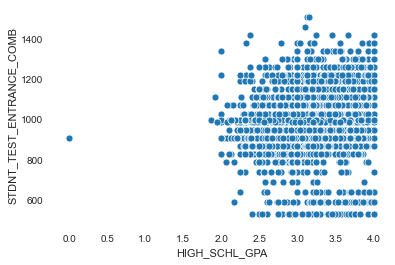

In [113]:
sns.scatterplot(x="HIGH_SCHL_GPA", y="STDNT_TEST_ENTRANCE_COMB", data=df)

# HIGH_SCHL_NAME

In [114]:
df['HIGH_SCHL_NAME'].isnull().sum()

1

In [115]:
df['HIGH_SCHL_NAME'].nunique()

439

In [116]:
df['HIGH_SCHL_NAME'].value_counts(dropna=False)

SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 165      1
SCHOOL 264      1
SCHOOL 524      1
SCHOOL 117      1
NaN             1
Name: HIGH_SCHL_NAME, Length: 440, dtype: int64

In [117]:
df['HIGH_SCHL_NAME'].describe()

count          3399
unique          439
top       SCHOOL 11
freq            249
Name: HIGH_SCHL_NAME, dtype: object

High school name does not give any important information , so dropping it

# FATHER_HI_EDU_DESC

In [118]:
df['FATHER_HI_EDU_DESC'].isnull().sum()

0

In [119]:
df['FATHER_HI_EDU_DESC'].nunique()

5

In [120]:
df['FATHER_HI_EDU_DESC'].value_counts(dropna=False)

High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [121]:
df['FATHER_HI_EDU_DESC'].describe()

count            3400
unique              5
top       High School
freq             1336
Name: FATHER_HI_EDU_DESC, dtype: object

In [122]:
df['FATHER_HI_EDU_DESC'].value_counts()

High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [123]:
FA_perc=df['FATHER_HI_EDU_DESC'].value_counts()

In [124]:
round(FA_perc/3400*100,2)

High School                 39.290
College/Beyond              38.500
No Information              12.710
Other/Unknown                6.650
Middle School/Junior High    2.850
Name: FATHER_HI_EDU_DESC, dtype: float64

# MOTHER_HI_EDU_DESC

In [125]:
df['MOTHER_HI_EDU_DESC'].isnull().sum()

0

In [126]:
df['MOTHER_HI_EDU_DESC'].nunique()

5

In [127]:
df['MOTHER_HI_EDU_DESC'].value_counts(dropna=False)

College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

In [128]:
df['MOTHER_HI_EDU_DESC'].describe()

count               3400
unique                 5
top       College/Beyond
freq                1500
Name: MOTHER_HI_EDU_DESC, dtype: object

In [129]:
MOT_perc=df['MOTHER_HI_EDU_DESC'].value_counts()

In [130]:
round(MOT_perc/3400*100,2)

College/Beyond              44.120
High School                 35.970
No Information              14.380
Other/Unknown                3.440
Middle School/Junior High    2.090
Name: MOTHER_HI_EDU_DESC, dtype: float64

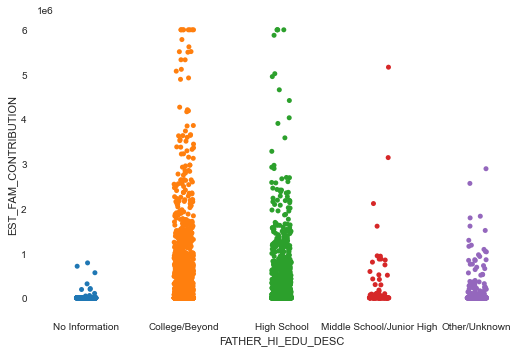

In [131]:
sns.catplot(x="FATHER_HI_EDU_DESC", y="EST_FAM_CONTRIBUTION",aspect=1.5,height=5 ,data=df)

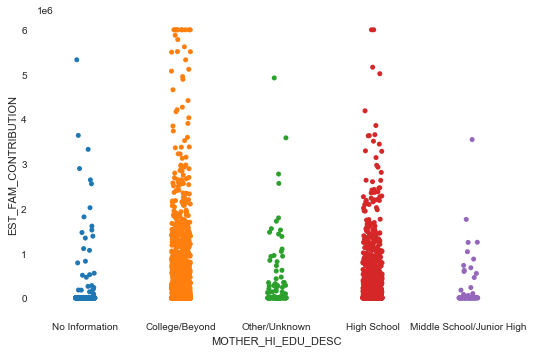

In [132]:
sns.catplot(x="MOTHER_HI_EDU_DESC", y="EST_FAM_CONTRIBUTION",aspect=1.5,height=5 ,data=df)

# DEGREE_GROUP_DESC

In [133]:
df['DEGREE_GROUP_DESC'].isnull().sum()

0

In [134]:
df['DEGREE_GROUP_DESC'].nunique()

3

In [135]:
df['DEGREE_GROUP_DESC'].value_counts(dropna=False)

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

In [136]:
df['DEGREE_GROUP_DESC'].describe()

count          3400
unique            3
top       Bachelors
freq           3384
Name: DEGREE_GROUP_DESC, dtype: object

In [137]:
DEG_perc=df['DEGREE_GROUP_DESC'].value_counts()

In [138]:
round(DEG_perc/3400*100,2)

Bachelors          99.530
Associate           0.350
Career Associate    0.120
Name: DEGREE_GROUP_DESC, dtype: float64

# FIRST_TERM_ATTEMPT_HRS

In [139]:
df['FIRST_TERM_ATTEMPT_HRS'].isnull().sum()

0

In [140]:
df['FIRST_TERM_ATTEMPT_HRS'].nunique()

12

In [141]:
df['FIRST_TERM_ATTEMPT_HRS'].value_counts(dropna=False)

15    798
13    743
12    737
14    531
16    431
17    110
18     31
19     10
9       3
21      2
11      2
20      2
Name: FIRST_TERM_ATTEMPT_HRS, dtype: int64

In [142]:
df['FIRST_TERM_ATTEMPT_HRS'].describe()

count   3400.000
mean      13.986
std        1.554
min        9.000
25%       13.000
50%       14.000
75%       15.000
max       21.000
Name: FIRST_TERM_ATTEMPT_HRS, dtype: float64

# FIRST_TERM_EARNED_HRS

In [143]:
df['FIRST_TERM_EARNED_HRS'].isnull().sum()

0

In [144]:
df['FIRST_TERM_EARNED_HRS'].nunique()

22

In [145]:
df['FIRST_TERM_EARNED_HRS'].value_counts(dropna=False)

12    685
15    532
13    527
14    323
9     286
16    252
10    212
11    158
6      97
8      93
7      73
17     50
3      34
4      18
18     17
5      12
0       8
19      8
2       7
1       5
21      2
20      1
Name: FIRST_TERM_EARNED_HRS, dtype: int64

In [146]:
df['FIRST_TERM_EARNED_HRS'].describe()

count   3400.000
mean      12.205
std        2.986
min        0.000
25%       11.000
50%       13.000
75%       15.000
max       21.000
Name: FIRST_TERM_EARNED_HRS, dtype: float64

# SECOND_TERM_ATTEMPT_HRS

In [147]:
df['SECOND_TERM_ATTEMPT_HRS'].isnull().sum()

206

In [148]:
df['SECOND_TERM_ATTEMPT_HRS'].value_counts(dropna=False)

12.000    609
15.000    609
13.000    571
16.000    487
14.000    424
nan       206
17.000    205
18.000    119
19.000     73
9.000      21
10.000     20
11.000     19
20.000     10
7.000       9
6.000       4
3.000       3
8.000       3
4.000       3
23.000      2
21.000      1
22.000      1
2.000       1
Name: SECOND_TERM_ATTEMPT_HRS, dtype: int64

# SECOND_TERM_EARNED_HRS

In [149]:
df['SECOND_TERM_EARNED_HRS'].isnull().sum()

209

In [150]:
df['SECOND_TERM_EARNED_HRS'].nunique()

23

In [151]:
df['SECOND_TERM_EARNED_HRS'].value_counts(dropna=False)

12.000    565
13.000    440
15.000    438
16.000    316
14.000    308
9.000     240
nan       209
10.000    168
17.000    130
11.000    115
6.000      94
18.000     84
8.000      60
7.000      59
3.000      57
19.000     31
4.000      25
0.000      20
5.000      19
20.000      8
2.000       8
1.000       3
23.000      2
21.000      1
Name: SECOND_TERM_EARNED_HRS, dtype: int64

In [152]:
df['SECOND_TERM_EARNED_HRS'].describe()

count   3191.000
mean      12.511
std        3.470
min        0.000
25%       11.000
50%       13.000
75%       15.000
max       23.000
Name: SECOND_TERM_EARNED_HRS, dtype: float64

In [153]:
df.iloc[[676,2731,2830]]

,STUDENT_IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
676,7756369,18,F,BGD 3,Y,N,Nursing,N,nan,nan,998.000,200908,ENGL 1101,C,CHEM 1151,A,CHEM 1151L,A,ITDS 2749,A,NaN,NaN,NaN,NaN,201002,ENGL 1102,C,CPSC 1105,A,HIST 2111,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,90.000,3.400,SCHOOL 29,2.000,High School,2.000,High School,B,Bachelors,13,13,14.000,nan,0,0,0,0.000
2731,7853483,19,F,BGD 3,Y,N,Science,N,19.000,840.000,910.000,201008,BIOL 1215K,D,ENGL 1101,C,COMM 1110,B,NaN,NaN,NaN,NaN,NaN,NaN,201102,MATH 1111,F,BIOL 1225K,D,ENGL 1102,B,MUSC 1100,B,NaN,NaN,NaN,NaN,On Campus,1,117.000,3.100,SCHOOL 186,2.000,High School,2.000,High School,B,Bachelors,14,6,13.000,nan,0,0,0,0.000
2830,7849592,18,F,BGD 4,Y,N,Nursing,N,19.000,nan,910.000,200908,ENGL 1101,C,CHEM 1151,B,SOCI 1101,B,CHEM 1151L,A,ITDS 2748,A,NaN,NaN,201002,ENGL 1102,F,MATH 1101,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,0.000,3.530,SCHOOL 395,2.000,High School,3.000,College/Beyond,B,Bachelors,14,14,12.000,nan,1104060,1324500,220440,309360.000


In [154]:
df[df['SECOND_TERM_ATTEMPT_HRS'] < df['SECOND_TERM_EARNED_HRS']]

,STUDENT_IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
662,7946631,18,M,BGD 1,N,N,Arts,N,nan,nan,998.000,200808,ENGL 1101,B,ITDS 2735,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,200902,ECON 2105,C,COMM 1110,A,ENGL 1102,A,MATH 1111,A,NaN,NaN,NaN,NaN,Off Campus,0,274.000,3.640,SCHOOL 378,3.000,College/Beyond,nan,No Information,B,Bachelors,17,17,18.000,19.000,0,939000,5329500,0.000


In [155]:
df=df.drop([662,676,2731,2830],axis=0)

In [156]:
df[(df['SECOND_TERM_ATTEMPT_HRS'].isnull())&(df['SECOND_TERM_EARNED_HRS'].isnull())].shape

(206, 56)

In [157]:
mean_hrs=round(df['SECOND_TERM_ATTEMPT_HRS'].mean())
mean_hrs

14

In [158]:
df['SECOND_TERM_ATTEMPT_HRS'].fillna(mean_hrs,inplace=True)

In [159]:
df['SECOND_TERM_EARNED_HRS'].fillna(mean_hrs,inplace=True)

# GROSS_FIN_NEED

In [160]:
df['GROSS_FIN_NEED'].isnull().sum()

0

In [161]:
df['GROSS_FIN_NEED'].value_counts(dropna=False)

0          2234
1418100      69
1306020      18
1146420      15
1316580      14
           ... 
1034820       1
1022520       1
854580        1
299820        1
1333200       1
Name: GROSS_FIN_NEED, Length: 926, dtype: int64

In [162]:
df['GROSS_FIN_NEED'].describe()

count      3396.000
mean     303434.765
std      483631.042
min           0.000
25%           0.000
50%           0.000
75%      599580.000
max     2124900.000
Name: GROSS_FIN_NEED, dtype: float64

# COST_OF_ATTEND

In [163]:
df['COST_OF_ATTEND'].isnull().sum()

0

In [164]:
df['COST_OF_ATTEND'].describe()

count      3396.000
mean     551516.625
std      606468.275
min           0.000
25%           0.000
50%      150540.000
75%     1192815.000
max     2124900.000
Name: COST_OF_ATTEND, dtype: float64

# EST_FAM_CONTRIBUTION

In [165]:
df['EST_FAM_CONTRIBUTION'].value_counts(dropna=False)

0          2110
5999940      12
1080          4
800220        3
2400          3
           ... 
10920         1
117420        1
715440        1
129240        1
232800        1
Name: EST_FAM_CONTRIBUTION, Length: 1234, dtype: int64

In [166]:
df['EST_FAM_CONTRIBUTION'].describe()

count      3396.000
mean     343461.661
std      782942.871
min           0.000
25%           0.000
50%           0.000
75%      324180.000
max     5999940.000
Name: EST_FAM_CONTRIBUTION, dtype: float64

# UNMET_NEED

In [167]:
df['UNMET_NEED'].isnull().sum()

0

In [168]:
df['UNMET_NEED'].describe()

count       3396.000
mean       72214.486
std       279694.719
min     -1212072.000
25%            0.000
50%            0.000
75%       187615.500
max      1632660.000
Name: UNMET_NEED, dtype: float64

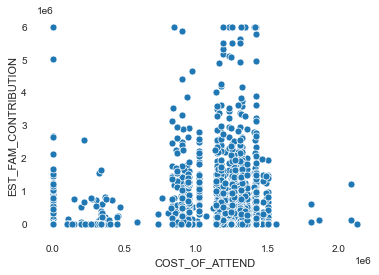

In [169]:
sns.scatterplot(x="COST_OF_ATTEND", y="EST_FAM_CONTRIBUTION", data=df)

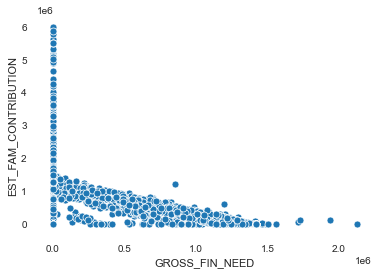

In [170]:
sns.scatterplot(x="GROSS_FIN_NEED", y="EST_FAM_CONTRIBUTION", data=df)

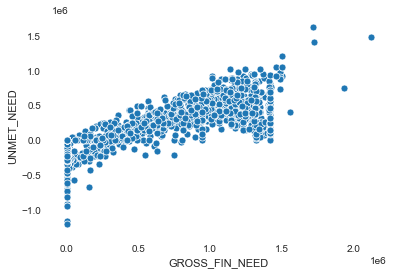

In [171]:
sns.scatterplot(x="GROSS_FIN_NEED", y="UNMET_NEED", data=df)

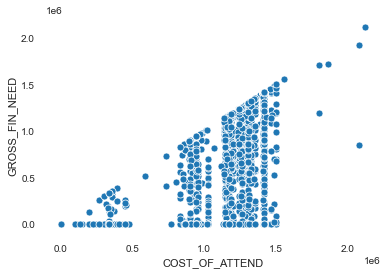

In [172]:
sns.scatterplot(x="COST_OF_ATTEND", y="GROSS_FIN_NEED", data=df)

In [173]:
                df.drop(['STUDENT_IDENTIFIER',
                         'DISTANCE_FROM_HOME',
                         'HIGH_SCHL_NAME',
                         'STDNT_MINOR',
                         'DEGREE_GROUP_CD',
                         'STDNT_TEST_ENTRANCE1',
                         'STDNT_TEST_ENTRANCE2',
                         'FIRST_TERM',
                         'SECOND_TERM',
                         'FATHER_HI_EDU_CD',
                         'MOTHER_HI_EDU_CD',
                         'CORE_COURSE_GRADE_1_F',
                         'CORE_COURSE_GRADE_2_F',
                         'CORE_COURSE_GRADE_3_F',
                         'CORE_COURSE_GRADE_4_F',
                         'CORE_COURSE_GRADE_5_F',
                         'CORE_COURSE_GRADE_6_F',
                         'CORE_COURSE_GRADE_1_S',
                         'CORE_COURSE_GRADE_2_S',
                         'CORE_COURSE_GRADE_3_S',
                         'CORE_COURSE_GRADE_4_S',
                         'CORE_COURSE_GRADE_5_S',
                         'CORE_COURSE_GRADE_6_S',
                         'CORE_COURSE_NAME_1_F',
                         'CORE_COURSE_NAME_2_F',
                         'CORE_COURSE_NAME_3_F',
                         'CORE_COURSE_NAME_4_F',
                         'CORE_COURSE_NAME_5_F',
                         'CORE_COURSE_NAME_6_F',
                         'CORE_COURSE_NAME_1_S',
                         'CORE_COURSE_NAME_2_S',
                         'CORE_COURSE_NAME_3_S',
                         'CORE_COURSE_NAME_4_S',
                         'CORE_COURSE_NAME_5_S',
                         'CORE_COURSE_NAME_6_S'],axis=1,inplace=True)

In [174]:
                  df=df[['STDNT_AGE',
                         'STDNT_GENDER',
                         'STDNT_BACKGROUND',
                         'IN_STATE_FLAG',
                         'INTERNATIONAL_STS',
                         'STDNT_MAJOR',
                         'STDNT_TEST_ENTRANCE_COMB',
                         'HOUSING_STS',
                         'HIGH_SCHL_GPA',
                         'FATHER_HI_EDU_DESC',
                         'MOTHER_HI_EDU_DESC',
                         'DEGREE_GROUP_DESC',
                         'FIRST_TERM_ATTEMPT_HRS',
                         'FIRST_TERM_EARNED_HRS',
                         'SECOND_TERM_ATTEMPT_HRS',
                         'SECOND_TERM_EARNED_HRS',
                         'GROSS_FIN_NEED',
                         'COST_OF_ATTEND',
                         'EST_FAM_CONTRIBUTION',
                         'UNMET_NEED',
                         'RETURNED_2ND_YR']]

In [175]:
df.head()

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,RETURNED_2ND_YR
0,18,F,BGD 1,Y,N,Undeclared,1150.000,On Campus,4.000,No Information,No Information,Bachelors,16,16,14.000,14.000,0,0,0,0.000,0
1,19,F,BGD 1,N,N,Undeclared,1190.000,Off Campus,2.890,College/Beyond,College/Beyond,Bachelors,18,18,18.000,18.000,570000,1355760,785760,459300.000,1
2,18,M,BGD 1,Y,N,Science,1030.000,On Campus,3.390,High School,Other/Unknown,Bachelors,15,15,14.000,14.000,0,0,0,0.000,1
3,18,M,BGD 1,Y,N,Undeclared,1220.000,On Campus,2.930,College/Beyond,College/Beyond,Bachelors,13,13,14.000,14.000,0,0,0,0.000,1
4,18,F,BGD 1,Y,N,Arts,1190.000,Off Campus,3.860,College/Beyond,High School,Bachelors,12,12,12.000,12.000,835920,1355760,519840,278340.000,1


In [176]:
df.shape

(3396, 21)

# MODEL

In [177]:
df.isnull().sum()

STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_TEST_ENTRANCE_COMB    0
HOUSING_STS                 0
HIGH_SCHL_GPA               0
FATHER_HI_EDU_DESC          0
MOTHER_HI_EDU_DESC          0
DEGREE_GROUP_DESC           0
FIRST_TERM_ATTEMPT_HRS      0
FIRST_TERM_EARNED_HRS       0
SECOND_TERM_ATTEMPT_HRS     0
SECOND_TERM_EARNED_HRS      0
GROSS_FIN_NEED              0
COST_OF_ATTEND              0
EST_FAM_CONTRIBUTION        0
UNMET_NEED                  0
RETURNED_2ND_YR             0
dtype: int64

In [178]:
X=df.drop('RETURNED_2ND_YR',axis=1)
y=df['RETURNED_2ND_YR']

In [179]:
X=pd.get_dummies(X)

In [180]:
X.shape

(3396, 49)

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

# XGB Classifier

In [182]:
from xgboost import XGBClassifier

In [183]:
clf_xgb = XGBClassifier(random_state=10)

In [184]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [185]:
# make predictions for test data
y_pred_xgb = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
# evaluate predictions
accuracy_xgb = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 78.82%


# Bagging Classifier

In [188]:
clf_bag=BaggingClassifier(random_state=10)

In [189]:
clf_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=10, verbose=0,
                  warm_start=False)

In [190]:
y_pred_bag=clf_bag.predict(X_test)

In [191]:
accuracy_bag=accuracy_score(y_test,y_pred_bag)

In [192]:
print("Accuracy: %.2f%%" % (accuracy_bag * 100.0))

Accuracy: 76.18%


# Random Forest Classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
clf_rf=RandomForestClassifier(random_state=10)

In [195]:
clf_rf.fit(X_train,y_train)

/Users/shubhamkumar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [196]:
y_pred_rf=clf_rf.predict(X_test)

In [197]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)

In [198]:
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

Accuracy: 77.06%


# Logistic Regression

In [199]:
df_train=df.sample(frac=0.80,random_state=200)
df_test=df.drop(df_train.index)

In [200]:
df_train['RETURNED_2ND_YR'].value_counts()

1    2138
0     579
Name: RETURNED_2ND_YR, dtype: int64

In [201]:
df_test['RETURNED_2ND_YR'].value_counts()

1    536
0    143
Name: RETURNED_2ND_YR, dtype: int64

In [202]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [203]:
df_train.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
       'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_TEST_ENTRANCE_COMB',
       'HOUSING_STS', 'HIGH_SCHL_GPA', 'FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC', 'FIRST_TERM_ATTEMPT_HRS',
       'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS',
       'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND',
       'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'RETURNED_2ND_YR'],
      dtype='object')

In [204]:
df.head()

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,HIGH_SCHL_GPA,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,RETURNED_2ND_YR
0,18,F,BGD 1,Y,N,Undeclared,1150.000,On Campus,4.000,No Information,No Information,Bachelors,16,16,14.000,14.000,0,0,0,0.000,0
1,19,F,BGD 1,N,N,Undeclared,1190.000,Off Campus,2.890,College/Beyond,College/Beyond,Bachelors,18,18,18.000,18.000,570000,1355760,785760,459300.000,1
2,18,M,BGD 1,Y,N,Science,1030.000,On Campus,3.390,High School,Other/Unknown,Bachelors,15,15,14.000,14.000,0,0,0,0.000,1
3,18,M,BGD 1,Y,N,Undeclared,1220.000,On Campus,2.930,College/Beyond,College/Beyond,Bachelors,13,13,14.000,14.000,0,0,0,0.000,1
4,18,F,BGD 1,Y,N,Arts,1190.000,Off Campus,3.860,College/Beyond,High School,Bachelors,12,12,12.000,12.000,835920,1355760,519840,278340.000,1


In [205]:
model1=smf.glm('RETURNED_2ND_YR~(STDNT_AGE)+C(STDNT_GENDER)+(STDNT_BACKGROUND)+C(IN_STATE_FLAG)+C(INTERNATIONAL_STS)+C(STDNT_MAJOR)+(STDNT_TEST_ENTRANCE_COMB)+C(HOUSING_STS)+(HIGH_SCHL_GPA)+C(FATHER_HI_EDU_DESC)+C(MOTHER_HI_EDU_DESC)+C(DEGREE_GROUP_DESC)+(FIRST_TERM_ATTEMPT_HRS)+(FIRST_TERM_EARNED_HRS)+(SECOND_TERM_ATTEMPT_HRS)+(SECOND_TERM_EARNED_HRS)+(GROSS_FIN_NEED)+(COST_OF_ATTEND)+(EST_FAM_CONTRIBUTION)+(UNMET_NEED)',data=df_train, family=sm.families.Binomial()).fit()

In [206]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        RETURNED_2ND_YR   No. Observations:                 2717
Model:                            GLM   Df Residuals:                     2676
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1334.4
Date:                Mon, 29 Jun 2020   Deviance:                       2668.7
Time:                        15:11:11   Pearson chi2:                 2.75e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [207]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [208]:
y_true=df_test['RETURNED_2ND_YR']

In [209]:
y_pred=model1.predict(df_test).map(lambda x:1 if x>0.5 else 0)

In [210]:
accuracy =metrics.accuracy_score(y_true,y_pred)

In [211]:
print('accuracy : ',accuracy)

accuracy :  0.7864506627393225


# Gradient Boosting

In [212]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
baseline = GradientBoostingClassifier(random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
pred=baseline.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred),'\n')
print(classification_report(y_test, pred))
print('R square value :',baseline.score(X_train,y_train))
print('Confusion_matrix :','\n',confusion_matrix(y_test,pred))

accuracy_score : 0.7955882352941176 

              precision    recall  f1-score   support

           0       0.61      0.14      0.22       146
           1       0.81      0.98      0.88       534

    accuracy                           0.80       680
   macro avg       0.71      0.56      0.55       680
weighted avg       0.76      0.80      0.74       680

R square value : 0.8357879234167894
Confusion_matrix : 
 [[ 20 126]
 [ 13 521]]









.
























Accuracy of different models

Gradient Boosting Classifier : 79.56 %


XGB Classifier : 78.82%


Logistic Regression : 78.64%   


Random Forest Classifier : 77.06 %


Bagging Classifier : 76.18 %




Gradient Boosting Classifier gives the most accuracy . Finalizing on it .

# Tunign n_estimators and Learning rate

In [214]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([  0.34078379,   0.82082949,   1.63439722,   2.48643751,
           3.31058445,   4.14292784,   5.03644314,   5.87060962,
           0.33750701,   0.80572133,   1.62032166,   2.45299006,
           3.27434931,   4.12741771,   4.98209629,   5.84096551,
           0.34055533,   0.80971923,   1.61147699,   2.41173491,
           3.21442037,   4.04003716,   4.8525516 ,   5.68410177,
           0.33906341,   0.83862753,   1.64659324,   2.43355794,
           3.2348309 ,   4.13141723,   5.06571302,   5.77751656,
           0.34608703,   0.85153656,   1.68399858,   2.49351182,
           3.30293398,   4.3474102 ,   4.92617965,   5.62244344,
           0.34366856,   0.83696117,   1.66631474,   2.51161847,
           3.33821363,  52.58763218, 151.31941857,   6.65861087]),
  'std_fit_time': array([6.28491863e-03, 1.23492328e-02, 1.15750720e-02, 3.64189907e-02,
         3.80946682e-02, 2.86402425e-02, 3.74212376e-02, 6.38991270e-02,
         3.48577446e-03, 8.49016804e-03

# Tuning max_depth

In [215]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.005,n_estimators=750, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([1.26129866, 1.80045962, 2.64217224, 3.65994101, 5.27983141,
         6.84725437]),
  'std_fit_time': array([0.01389737, 0.02108459, 0.04294344, 0.03485277, 0.0450766 ,
         1.00428342]),
  'mean_score_time': array([0.01178484, 0.01338158, 0.01892447, 0.01831417, 0.02231622,
         0.02530837]),
  'std_score_time': array([0.00159608, 0.00031196, 0.00356682, 0.00075855, 0.00037186,
         0.00186467]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.78676471, 0.79044118, 0.79044118, 0.79227941, 0.79044118,
         0.78676471]),
  'split1_test_score': array([0.79373849, 0.79926335, 0.80294659, 0.79742173, 0.80110497,
         0.79373849]),
  'split2_test_score':

# First evaluation of new model on test set

In [216]:
import matplotlib
import matplotlib.pyplot as plt

In [217]:
model1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=750,max_depth=6, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
pred=model1.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred),'\n')
print(classification_report(y_test, pred))
print('R square value :',baseline.score(X_train,y_train))
print('Confusion_matrix :','\n',confusion_matrix(y_test,pred))

accuracy_score : 0.7955882352941176 

              precision    recall  f1-score   support

           0       0.65      0.10      0.18       146
           1       0.80      0.99      0.88       534

    accuracy                           0.80       680
   macro avg       0.73      0.54      0.53       680
weighted avg       0.77      0.80      0.73       680

R square value : 0.8357879234167894
Confusion_matrix : 
 [[ 15 131]
 [  8 526]]


# Tree related parameters
# Min sample split and min samples leaf

In [218]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.005, n_estimators=750,max_depth=6, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([5.31237459, 4.94186463, 4.68036299, 4.77985506, 4.3329329 ,
         3.9891562 , 3.61699219, 3.4009902 , 3.14356041, 4.74627929,
         4.96067629, 4.78587666, 4.65086422, 4.49990001, 4.07550259,
         3.67027273, 3.46128607, 3.16242728, 4.45671034, 4.42124176,
         4.50166655, 4.57957044, 4.43641372, 4.055128  , 3.63826799,
         3.43479424, 3.1707387 , 4.23235526, 4.23120632, 4.19995179,
         4.21847954, 4.20950375, 4.03765445, 3.62999902, 3.39936252,
         3.13980212, 4.02414122, 4.01822982, 4.05293303, 4.03043938,
         4.08210707, 4.00227175, 3.62003083, 3.41544862, 2.91424627]),
  'std_fit_time': array([0.06840628, 0.06953286, 0.11163022, 0.19815336, 0.10642046,
         0.09827164, 0.10679924, 0.05827395, 0.07972836, 0.08679706,
         0.20403081, 0.07227545, 0.09049636, 0.10194272, 0.08768341,
         0.0543279 , 0.10245245, 0.07303958, 0.08861909, 0.06855226,
         0.13355041, 0.15801576, 0.08979537, 0.09104607, 0.08757976,

# Max features

In [219]:
#TUNING MAX FEATURES
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.005, n_estimators=750,max_depth=6, min_samples_split=2, min_samples_leaf=7, subsample=1, random_state=10), 
param_grid = p_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([3.32299752, 3.87967787, 3.5828618 , 3.80987082, 4.24382248,
         3.68285632]),
  'std_fit_time': array([0.08777379, 0.37900187, 0.10211316, 0.08170649, 0.11906029,
         0.65224026]),
  'mean_score_time': array([0.04056144, 0.02370629, 0.02258878, 0.0231277 , 0.02306275,
         0.01955476]),
  'std_score_time': array([0.02052008, 0.00238546, 0.00027238, 0.00099566, 0.00064075,
         0.00274869]),
  'param_max_features': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 2},
   {'max_features': 3},
   {'max_features': 4},
   {'max_features': 5},
   {'max_features': 6},
   {'max_features': 7}],
  'split0_test_score': array([0.78860294, 0.79411765, 0.79227941, 0.79779412, 0.79595588,
         0.79595588]),
  'split1_test_score': array([0.79189687, 0.79926335, 0.79742173, 0.79742173, 0.79373849,
         0.79742173]),
 

In [220]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.005, n_estimators=750,max_depth=6, min_samples_split=2, min_samples_leaf=7,max_features=7 , random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([4.64480939, 4.30522799, 4.33844299, 4.38071923, 4.40769644,
         4.37761002, 3.80383263]),
  'std_fit_time': array([0.1816333 , 0.0531856 , 0.06746826, 0.0598258 , 0.09063254,
         0.10121671, 0.39034392]),
  'mean_score_time': array([0.02273598, 0.02407103, 0.02251043, 0.02278943, 0.02253432,
         0.02257099, 0.01918521]),
  'std_score_time': array([0.0003413 , 0.00298032, 0.00041403, 0.00032023, 0.00043402,
         0.00050954, 0.00252401]),
  'param_subsample': masked_array(data=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9},
   {'subsample': 0.95},
   {'subsample': 1}],
  'split0_test_score': array([0.79963235, 0.79779412, 0.79963235, 0.79963235, 0.79963235,
         0.79963235, 0.79595588]),
  'split1_test

# Evaluation of final model on Test set

In [221]:
new=GradientBoostingClassifier(learning_rate=0.005, n_estimators=750,max_depth=6, min_samples_split=2, min_samples_leaf=7,max_features=7 , subsample=1, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Importance of Features')
#plt.ylabel('Feature Importance Score')
pred=new.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred),'\n')
print(classification_report(y_test, pred))
print('R square value :',new.score(X_train,y_train))
print('Confusion_matrix :','\n',confusion_matrix(y_test,pred))


accuracy_score : 0.7985294117647059 

              precision    recall  f1-score   support

           0       0.68      0.12      0.20       146
           1       0.80      0.99      0.88       534

    accuracy                           0.80       680
   macro avg       0.74      0.55      0.54       680
weighted avg       0.78      0.80      0.74       680

R square value : 0.8372606774668631
Confusion_matrix : 
 [[ 17 129]
 [  8 526]]


In [222]:
feat_imp

SECOND_TERM_EARNED_HRS                         0.187
SECOND_TERM_ATTEMPT_HRS                        0.121
UNMET_NEED                                     0.093
HIGH_SCHL_GPA                                  0.088
FIRST_TERM_EARNED_HRS                          0.067
COST_OF_ATTEND                                 0.046
GROSS_FIN_NEED                                 0.044
STDNT_TEST_ENTRANCE_COMB                       0.043
EST_FAM_CONTRIBUTION                           0.040
FIRST_TERM_ATTEMPT_HRS                         0.031
STDNT_MAJOR_Arts                               0.019
STDNT_BACKGROUND_BGD 1                         0.016
HOUSING_STS_Off Campus                         0.015
HOUSING_STS_On Campus                          0.014
STDNT_BACKGROUND_BGD 3                         0.013
MOTHER_HI_EDU_DESC_High School                 0.011
MOTHER_HI_EDU_DESC_College/Beyond              0.010
STDNT_GENDER_M                                 0.010
STDNT_GENDER_F                                

# Comparison of ROC AUC

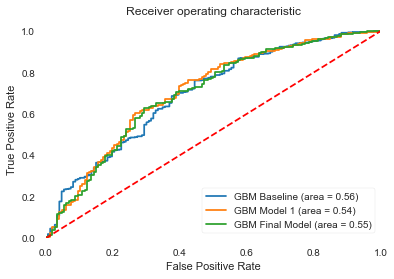

In [223]:



#run models
baseline = GradientBoostingClassifier(random_state=10)
baseline.fit(X_train,y_train)

model1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=750,max_depth=6, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=0.005, n_estimators=750,max_depth=6, min_samples_split=2, min_samples_leaf=7,max_features=7 , subsample=1, random_state=10)
new.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()